In [ ]:
# DAT405 Assignment 3 – Group 52
<p>Hampus Jansson - (6 hrs)<br>Erik Johannesen - (6 hrs)<br>April 20th, 2022<p>

# 1 a)

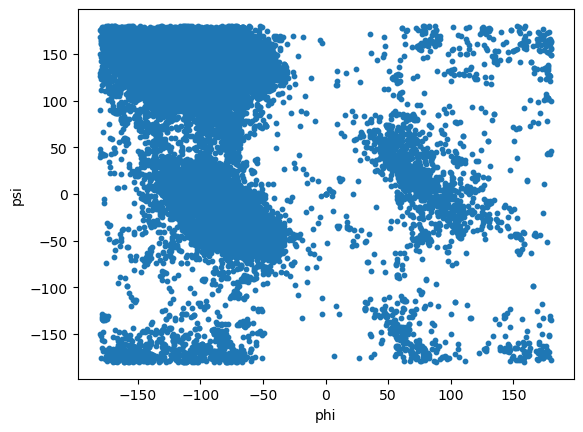

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, v_measure_score
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn import metrics
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

#reading dataframe
df1 = pd.read_csv('data_assignment3.csv')

#creating and showing the scatter plot
plt.scatter(df1['phi'], df1['psi'], s=10)
plt.xlabel('phi')
plt.ylabel('psi')
plt.show()

# 1 b)

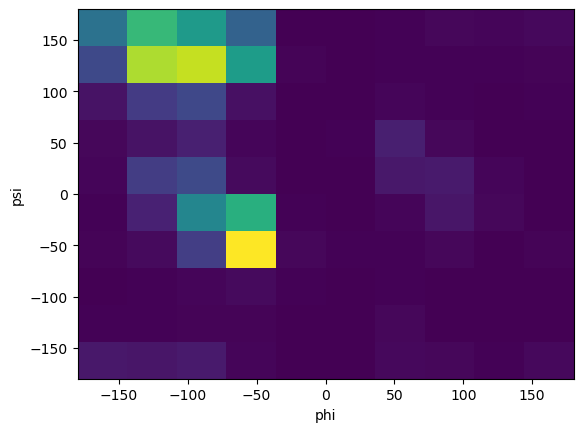

In [2]:
#creating and showing historgram
plt.hist2d(df1['phi'], df1['psi'])
plt.xlabel('phi')
plt.ylabel('psi')
plt.show()

# 1 c)

<p>In the first scatterplot, at least one cluster can is on the edge of the plot, where the edges wrap around to the other side. <br> By changing the beginning and endpoints of the axes, all the clusters can be shown closer to the middle for a better visualization.<p>
    

C:\Users\eriko\AppData\Local\Temp\ipykernel_180892\657819492.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PhiNeg.iloc[:, 3] += 360
C:\Users\eriko\AppData\Local\Temp\ipykernel_180892\657819492.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PsiNeg.iloc[:, 4] += 360
C:\Users\eriko\AppData\Local\Temp\ipykernel_180892\657819492.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

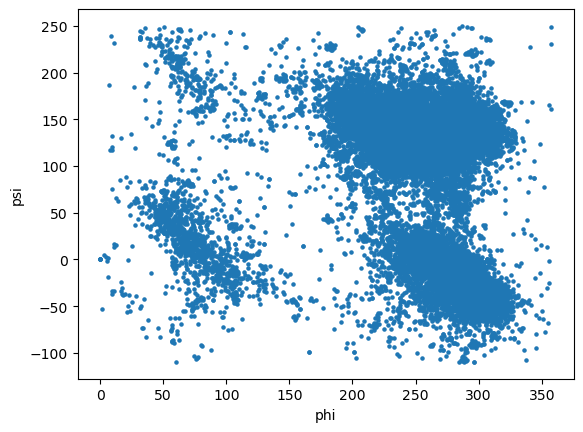

In [4]:
#shifting the points for the transformed plot
PhiNeg = df1[(df1['phi'] < 0) & (df1['psi'] >= 0)]
PsiNeg = df1[(df1['psi'] < 0) & (df1['phi'] >= 0)]
BothPos = df1[(df1['phi'] >= 0) & (df1['psi'] >= 0)]
BothNeg = df1[(df1['phi'] < 0) & (df1['psi'] < 0)]

PhiNeg.iloc[:, 3] += 360
PsiNeg.iloc[:, 4] += 360
BothNeg.iloc[:, 3:] += 360

merge1 = PhiNeg._append(PsiNeg)
merge2 = merge1._append(BothPos)
transformed = merge2._append(BothNeg)

transformed.loc[transformed['psi']>250, 'psi'] -= 360

phi = transformed['phi'].to_numpy()
psi = transformed['psi'].to_numpy()

X = transformed[["phi", "psi"]].to_numpy()

PhiPsi = transformed[['phi', 'psi']]


plt.scatter(transformed['phi'], transformed['psi'], s=5)
plt.xlabel('phi')
plt.ylabel('psi')
plt.show()

# 2 a)

<p>Using a silhouette analysis for several different values for K didn't show any below average silhouettes for any of the values, however K=2 and K=3 showed higher average silhouette coefficient values than the higher values for K. <br> The scatterplots show the higher values for K splitting what looks like obvious clusters to the human eye in the middle.<p>

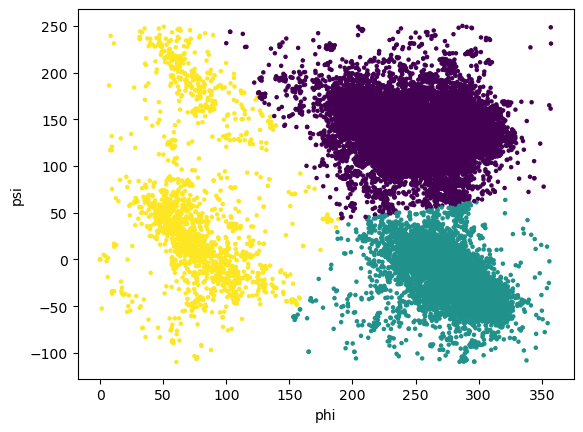

29369
For n_clusters = 2 The average silhouette_score is : 0.6253971549817875
For n_clusters = 3 The average silhouette_score is : 0.6837711240345412
For n_clusters = 4 The average silhouette_score is : 0.5155535814734744
For n_clusters = 5 The average silhouette_score is : 0.4637137240034444
For n_clusters = 6 The average silhouette_score is : 0.47211873870360177


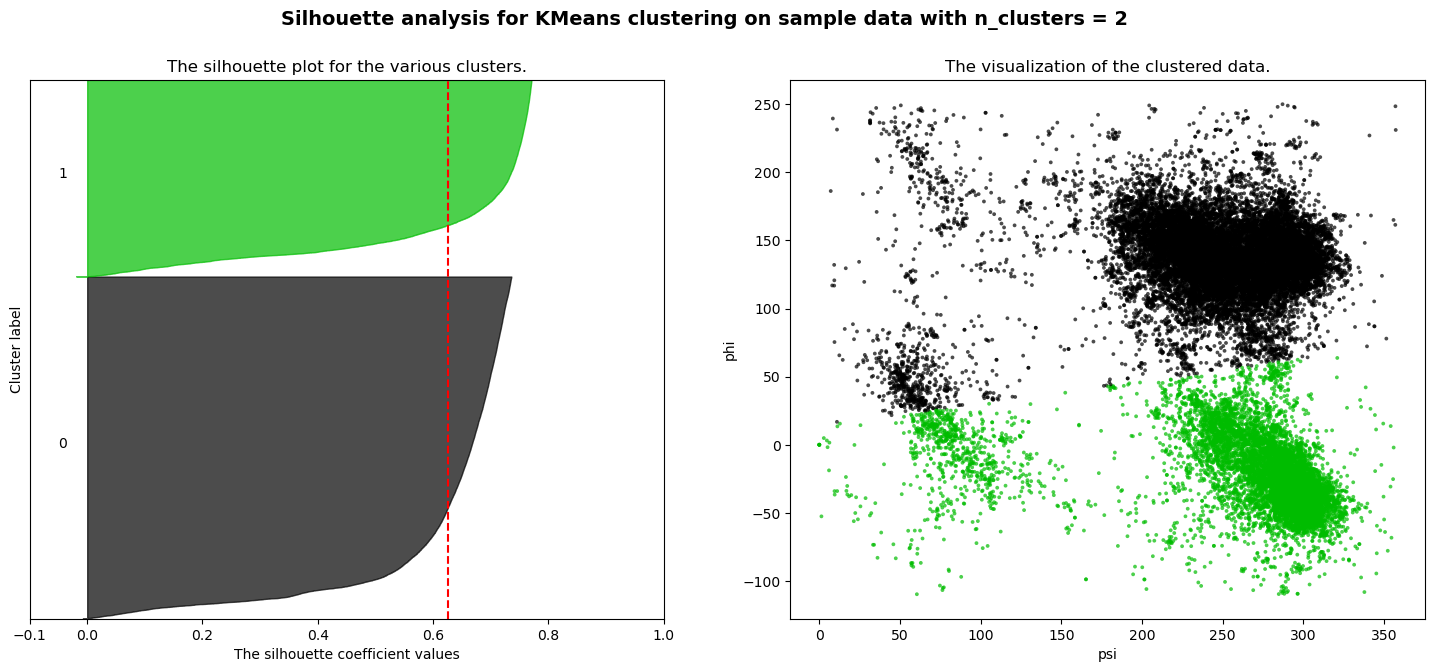

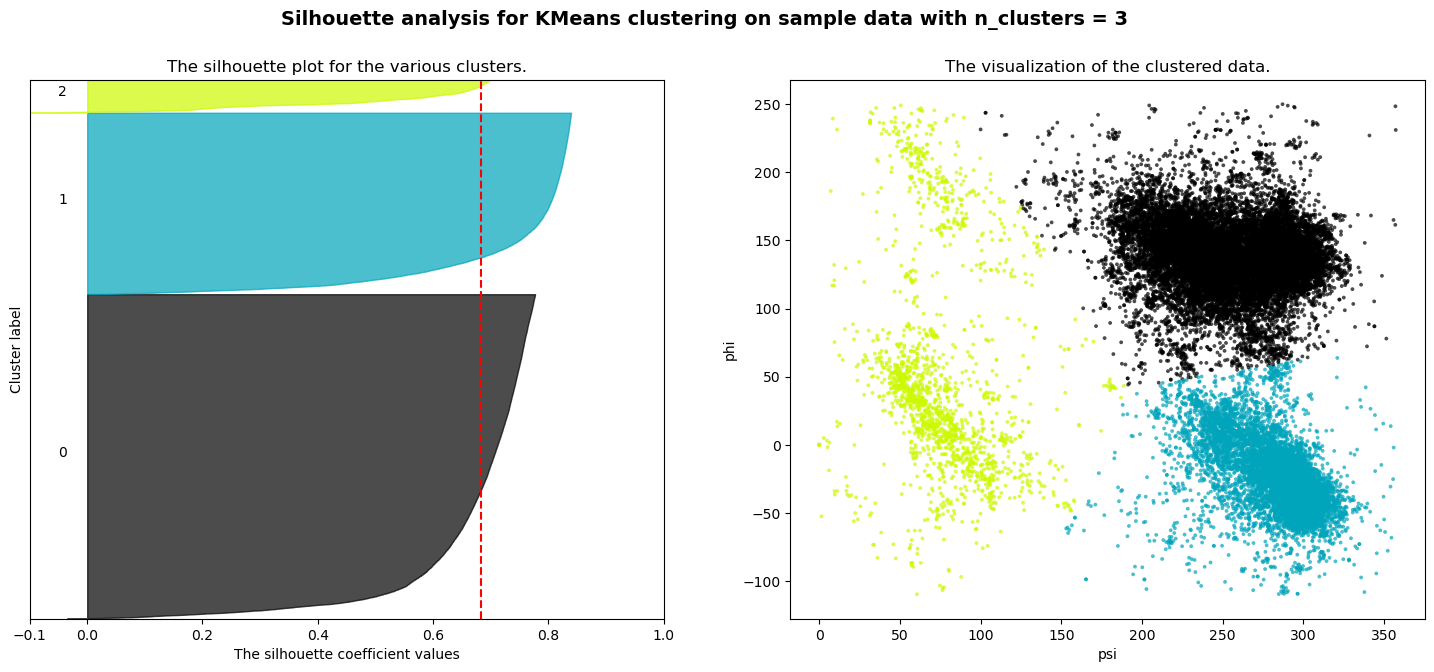

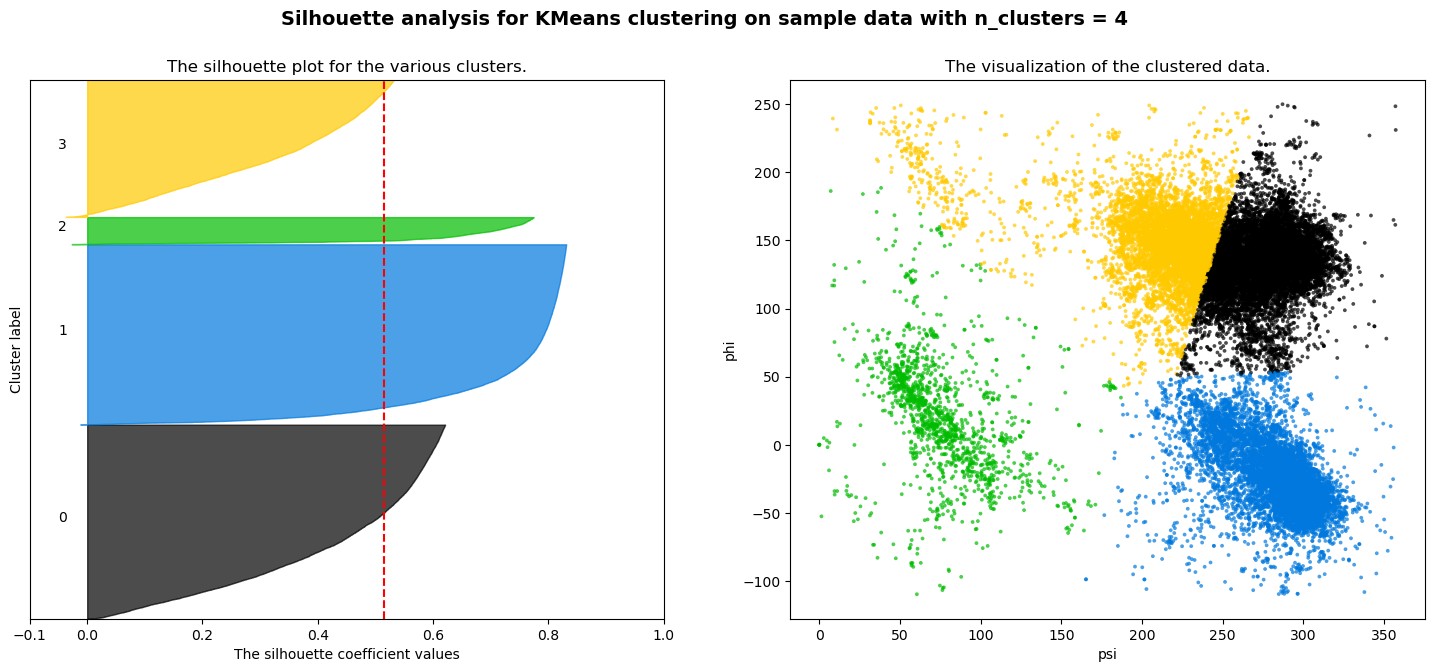

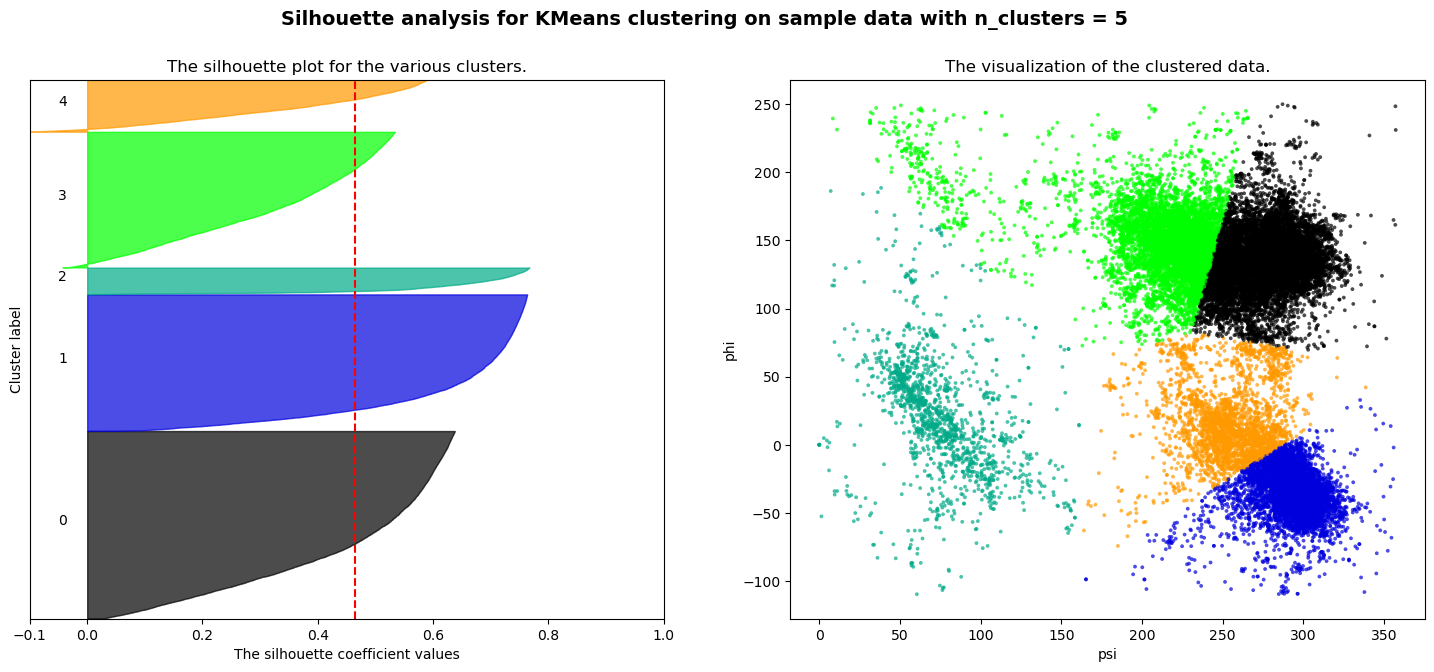

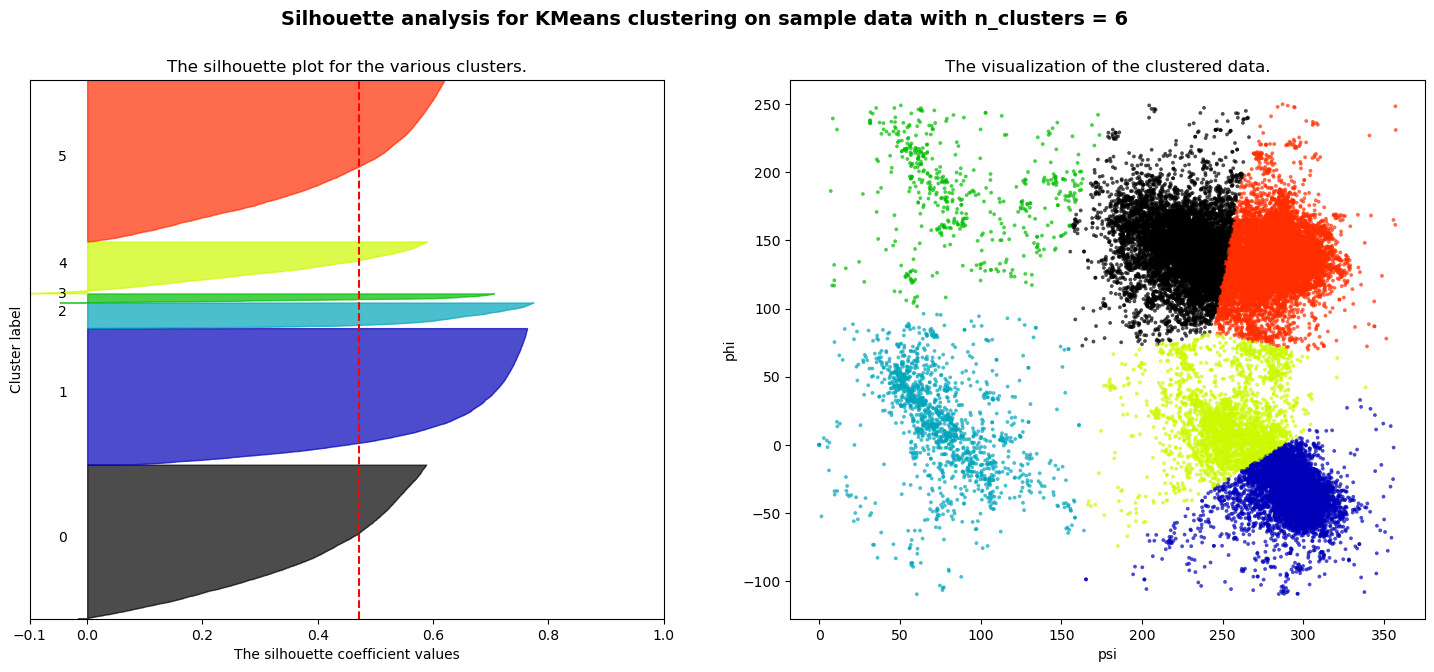

In [5]:

#plot showing the optimal clustering
y_pred = KMeans(n_clusters=3, n_init='auto', random_state=170).fit_predict(PhiPsi)
plt.scatter(phi[:, np.newaxis], psi, c=y_pred, s=5)
plt.xlabel('phi')
plt.ylabel('psi')
plt.show()

#silhouette
range_n_clusters = [2, 3, 4, 5, 6]

print(len(transformed))

# testing different amounts of clusters to find the best choice
for n in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(transformed) + (n + 1) * 10])

    clusterer = KMeans(n_clusters=n, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(PhiPsi)

    #finding the average silhouette coefficient
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n):
        
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n)
    ax2.scatter(
        phi[:, np.newaxis], psi, marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_


    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("psi")
    ax2.set_ylabel("phi")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# 2 b)

<p> The two clusters found where psi is roughly between 150 and 350 degrees seem reasonable, the areas with densely packed points were put into different clusters and none of those two areas were divided into different clusters. 
<br>It seems reasonable that the yellow cluster was separated from the other two clusters, however it also looks like that cluster should be divided into two different clusters. 
The K means model was unable to achieve this, since increasing the amount of clusters would prefer to split up the larger clusters before being able to see this cluster as two separate ones. <p>

# 3 a)

<p> The elbow point detection method suggested that a suitable value for the maximum distance between points would be 3.56. This appeared to be too low and led to nearly all points being considered outliers, and only a small number of points within the largest clusters were identified as clusters. 
<br> Testing different different combinations of maximum distance and minimum number of neighbors to be considered a core point yielded the best results with epsilon = 10 and the minimum number of points = 40. <br> 
Settting the minimum number of neighbors lower led to a very large amount of clusters, mostly from dividing the area with the most points into many small clusters, setting the minimum number higher led to nearly all points being considered outliers. <p>

Elbow point:  3.564346396450409


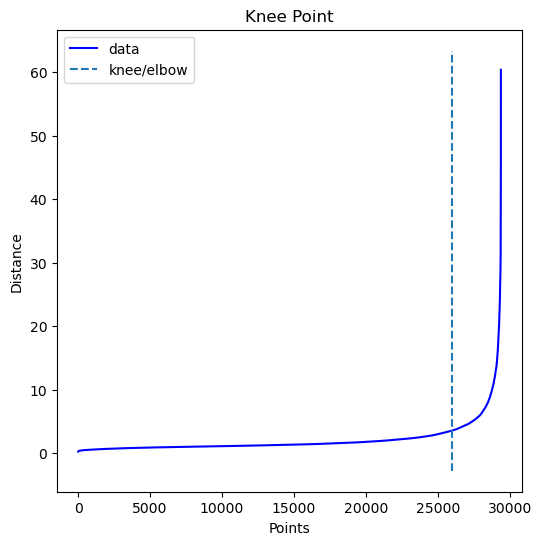

In [11]:
#creeating plot showing the elbow point
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(PhiPsi)

distances, indices = neighbors.kneighbors(PhiPsi)
distances = np.sort(distances[:, 10], axis=0)

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print("Elbow point: ", distances[knee.knee])

plt.show()

# 3 b)
<p> The best clustering is shown in this plot. <p>

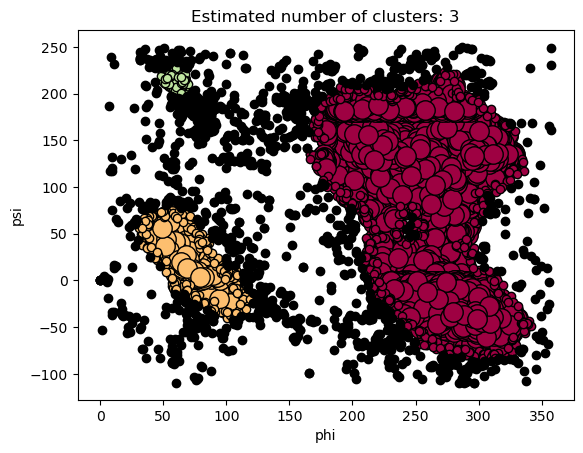

In [9]:
#creating model
db = DBSCAN(eps=10, min_samples=40).fit(PhiPsi)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)



unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

#creating and showing plot of clusters
plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.xlabel('phi')
plt.ylabel('psi')
plt.show()


# 3 c)

<p>The DBscan finds 1397 outliers. A histogram shows how many outliers there are of each residue type.<p>

Outliers: 1397


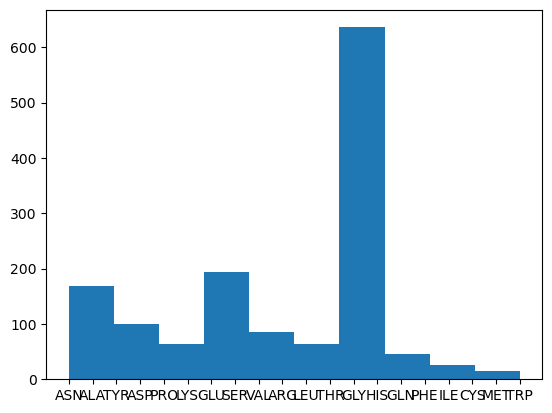

In [12]:
#finding number of outliers
print("Outliers: %d" % n_noise_)

#filtering the dataframe to find all outliers
transformed['Label'] = labels
outliers = transformed[(transformed['Label'] == -1)]

#cleating and showing histogram of outliers of every residue type
plt.hist(x=outliers['residue name'])
plt.show()

# 3 d)
<p> K-means was unable to find different clusters in the areas where there were relatively few points with larger distances between them. DBscan was able to find two different clusters in the area where K-means had only found one but was unable to identify the two largest clusters where many points were relatively close together. <p>

# 4
<p> The samples with residue type PRO were mostly gathered in the same area, almost all psi-angles could be found but the phi-value was almost exclusively between 250 and 350. Choosing a single type of sample led to the points being more concentrated with a high density and this is what DBscan is good at.
<br>Two clusters could be identified, here DBscan was able to find different clusters in the densest part.
<p>

Elbow point:  7.197071627907144


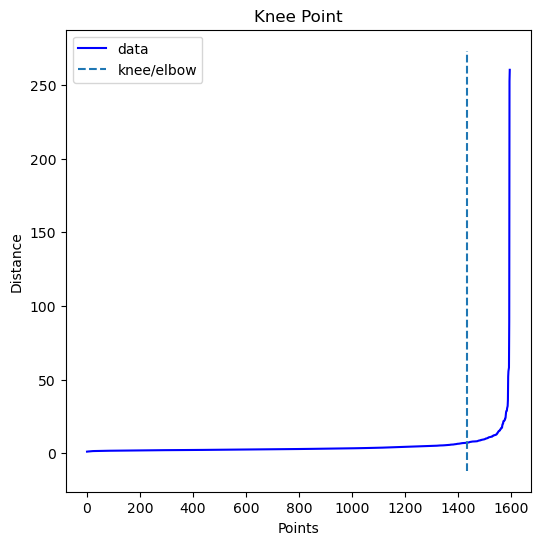

Estimated number of clusters: 2
Outliers: 45


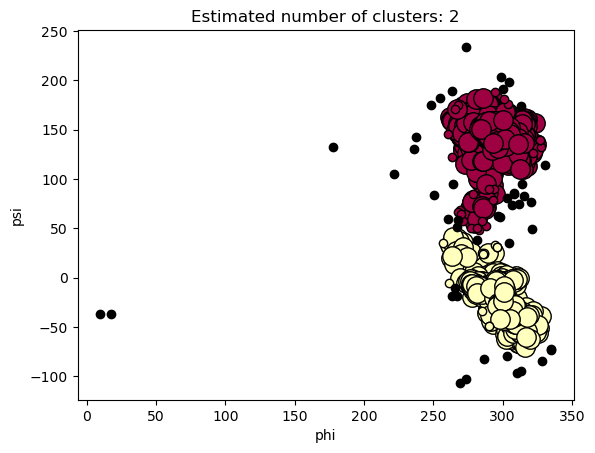

In [13]:
#filtering the dataframe
pro = transformed[(transformed['residue name'] == 'PRO')]
proPhiPsi = pro[['phi', 'psi']]

Xpro = pro[["phi", "psi"]].to_numpy()

#creating plot showing the elbow point
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(proPhiPsi)

distances, indices = neighbors.kneighbors(proPhiPsi)
distances = np.sort(distances[:, 10], axis=0)

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print("Elbow point: ", distances[knee.knee])

plt.show()

#creating model
db = DBSCAN(eps=10, min_samples=10).fit(proPhiPsi)
labels = db.labels_


n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


print("Estimated number of clusters: %d" % n_clusters_)
print("Outliers: %d" % n_noise_)

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = Xpro[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = Xpro[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

#creating and showing plot of clusters
plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.xlabel('phi')
plt.ylabel('psi')
plt.show()


